<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/cosin%20dist/%20orth/TEST3_cosian_dist_orth_best%20model_%20various%20img%20number%20for%20each%20subject(1-3-5---25)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install mne

     |████████████████████████████████| 6.4MB 2.1MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[61,40,10]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =160  # outer step len
sample_per_window = 160
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [5]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from shapely.geometry import LineString



# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Using TensorFlow backend.


Automatically created module for IPython interactive environment


In [6]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [7]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
subject_img_number

59

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        

        # Orthogonal Channel
        DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        DataChannelsOrt[e][2]=DataChannelsNormal[e][2]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag\
                                                      -ProjectionVector(DataChannelsOrt[e][1].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag

        e = e+1
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, sample_per_window), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsOrt[r][i][0+j*OuterSampleShift + z*InnerSampleShift:sample_per_window+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


In [0]:
# Construct Data Generator

GenTrainData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled=subject_number_array_shuffled,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled=train_shuff)

GenValidationData =GenerateGeneralData(BatchSize=batch_size,
                                        ListRawDataMain=list_rawdataTemp.copy(),
                                        SubjectArrayShuffled=subject_number_array_shuffled,
                                        ListChannel=list_channel,
                                        RemoveBaseLineFlag=RemoveBaseLine,
                                        OrthogonalFlag=Orthogonal,
                                        WindowLen=window_len,
                                        OuterSampleShift=outer_sample_shift,
                                        InnerSampleShift=inner_sample_shift,
                                        SampelNumberPerSec=sampel_number_per_sec,
                                        ImageArrayShuffled=val_shuff)

GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                ListRawDataMain=list_rawdataTemp.copy(),
                                SubjectArrayShuffled=subject_number_array_shuffled,
                                ListChannel=list_channel,
                                RemoveBaseLineFlag=RemoveBaseLine,
                                OrthogonalFlag=Orthogonal,
                                WindowLen=window_len,
                                OuterSampleShift=outer_sample_shift,
                                InnerSampleShift=inner_sample_shift,
                                SampelNumberPerSec=sampel_number_per_sec,
                                ImageArrayShuffled=test_shuff)

Epoch 1/50
1235/1235 [==============================] - 34s 28ms/step - loss: 2.9946 - acc: 0.1916 - val_loss: 1.8984 - val_acc: 0.4430
Epoch 2/50
1235/1235 [==============================] - 32s 26ms/step - loss: 1.5926 - acc: 0.5047 - val_loss: 0.9689 - val_acc: 0.7037
Epoch 3/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.8609 - acc: 0.7191 - val_loss: 0.6034 - val_acc: 0.7986
Epoch 4/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.5275 - acc: 0.8227 - val_loss: 0.3816 - val_acc: 0.8719
Epoch 5/50
1235/1235 [==============================] - 33s 27ms/step - loss: 0.3440 - acc: 0.8838 - val_loss: 0.1940 - val_acc: 0.9345
Epoch 6/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.2332 - acc: 0.9193 - val_loss: 0.1363 - val_acc: 0.9550
Epoch 7/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.1637 - acc: 0.9438 - val_loss: 0.0833 - val_acc: 0.9713
Epoch 8/50
1235/1235 [==========================

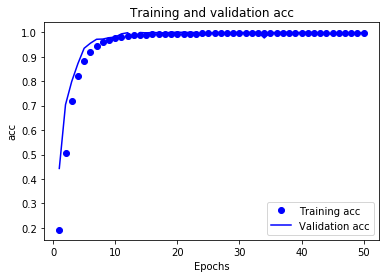

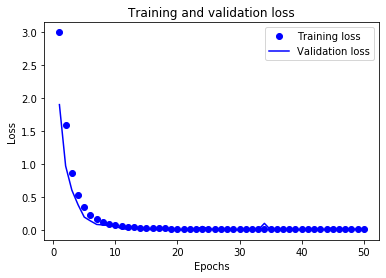

In [0]:


#################################################################################################
# Create Model
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same', input_shape = (window_len,160,ch_number) ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(subject_numberT, activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])

#################################################################################################
filepath = '/content/drive/My Drive/mymodels/bestmodel_point.h5'
#earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)
ModelCheckpoint_callbacks = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='auto', period=1)
# Train the Model
history = model.fit_generator(epochs =50,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              callbacks=[ModelCheckpoint_callbacks],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
#model.save('/content/drive/My Drive/mymodels/finalmodel_orth_Oz_T7_C3.h5')

In [12]:
model = load_model('/content/drive/My Drive/mymodels/bestmodel_point.h5')
model.summary()
model.pop()
model.pop()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 160, 128)      3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 80, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 78, 256)        295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 39, 256)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 37, 512)        1180160   
____________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


     TrainResult ([loss , acc])= [0.00010601813004244913, 1.0]
ValidationResult ([loss , acc])= [0.00021139885681026248, 1.0]
      TestResult ([loss , acc])= [0.0003442101747798707, 1.0]


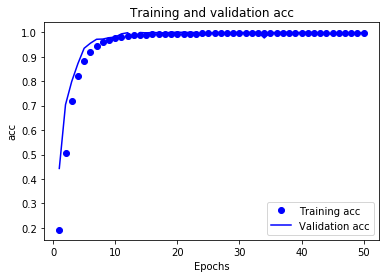

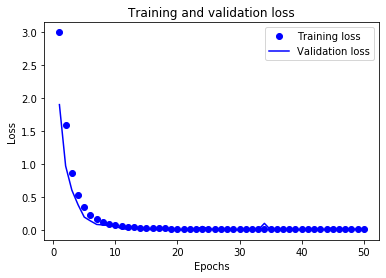

In [0]:
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject


total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)

In [13]:
import h5py
#hf = h5py.File('/content/drive/My Drive/mymodels/vectors/bestpointmodel_total_vectors_orth_Oz_T7_C3_160_spw.h5', 'w')
#hf.create_dataset('/content/drive/My Drive/mymodels/vectors/dataset_total_vectors', data=total_vector)
#hf.close()
hf = h5py.File('/content/drive/My Drive/mymodels/vectors/bestpointmodel_total_vectors_orth_Oz_T7_C3_160_spw.h5', 'r')
vec = hf.get('/content/drive/My Drive/mymodels/vectors/dataset_total_vectors')
vec


<HDF5 dataset "dataset_total_vectors": shape (109, 59, 1024), type "<f4">

In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
from shapely.geometry import LineString



In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  tryatr="try1_2000"
  threshold = 0
  pair_number = 2000
  sample_img_num = 25
  Batch_size = 25
  ITER = pair_number //2


  path = "/content/drive/My Drive/Orth_cosian/"+tryatr+" best point model- cosian dist_true ORTH new model" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,15):

      threshold =0.225+ (j*0.01)
      threshold = round(threshold,4)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled = np.arange(subject_img_number)
          np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled[:sample_img_num]
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled[sample_img_num : sample_img_num *2]

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=np.arange(subject_img_number)
          np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled[:sample_img_num]

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(j,') ' ,threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )
  
  x= np.array(list_FRR )
  #f= np.array(list_FRR )
  g= np.array(list_FAR )
  x1 = np.array([0,0.08])
  g1 = np.array([0,0.08])

  plt.figure(figsize=(10,10))

  i= 0
  # zip joins x and y coordinates in pairs
  for a,b in zip(x, g):
      #thr_round = list_threshold[i]
      label = str(i)
      i= i+1

      plt.annotate(label, (a,b))


  plt.plot(x, g)
  plt.plot(x1, g1)

  first_line = LineString(np.column_stack((x, g)))
  second_line = LineString(np.column_stack((x1, g1)))
  intersection = first_line.intersection(second_line)
  plt.plot(intersection,intersection, 'o')
  print(intersection)
 
 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()

  plt.savefig(png_completeName) 
  #bob.measure.plot.det(list_FRR,list_FAR)
  #%matplotlib qt

  print("####" +"sample img num:"+str(sample_img_num) +"_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")")

  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_FAR[j], list_FRR[j] , list_EER[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])



Successfully created the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model1sample num_2000pair_ouer shift160 
1 )  0.235 . 
 92.4 % 
 true_result: 1848 false_result: 152 
 TP: 867 FN: 133 FRR: 0.133 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.076 

2 )  0.245 . 
 92.8 % 
 true_result: 1856 false_result: 144 
 TP: 888 FN: 112 FRR: 0.112 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.07200000000000001 

3 )  0.255 . 
 92.55 % 
 true_result: 1851 false_result: 149 
 TP: 891 FN: 109 FRR: 0.109 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.0745 

4 )  0.265 . 
 93.0 % 
 true_result: 1860 false_result: 140 
 TP: 900 FN: 100 FRR: 0.1 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.07 

5 )  0.275 . 
 93.7 % 
 true_result: 1874 false_result: 126 
 TP: 915 FN: 85 FRR: 0.085 
 TN: 959 FP: 41 FAR: 0.041 
 EER: 0.063 

6 )  0.285 . 
 93.75 % 
 true_result: 1875 false_result: 125 
 TP: 915 FN: 85 FRR: 0.085 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.0625 

7 )  0.295 . 
 93.85 % 
 true_re

No handles with labels found to put in legend.


14 )  0.365 . 
 93.5 % 
 true_result: 1870 false_result: 130 
 TP: 973 FN: 27 FRR: 0.027 
 TN: 897 FP: 103 FAR: 0.103 
 EER: 0.065 

POINT (0.06 0.06)
####S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model1sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 91.7 % 
 true_result: 1834 false_result: 166 
 TP: 860 FN: 140 FRR: 0.14 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.083 

2 )  0.245 . 
 91.65 % 
 true_result: 1833 false_result: 167 
 TP: 862 FN: 138 FRR: 0.138 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.0835 

3 )  0.255 . 
 92.85 % 
 true_result: 1857 false_result: 143 
 TP: 890 FN: 110 FRR: 0.11 
 TN: 967 FP: 33 FAR: 0.033 
 EER: 0.07150000000000001 

4 )  0.265 . 
 92.3 % 
 true_result: 1846 false_result: 154 
 TP: 887 FN: 113 FRR: 0.113 
 TN: 959 FP: 41 FAR: 0.041 
 EER: 0.077 

5 )  0.275 . 
 92.25 % 
 true_result: 1845 false_result: 155 
 TP: 912 FN: 88 FRR: 0.088 
 TN: 933 FP: 67 FAR: 0.067 
 EE

No handles with labels found to put in legend.


14 )  0.365 . 
 91.7 % 
 true_result: 1834 false_result: 166 
 TP: 970 FN: 30 FRR: 0.03 
 TN: 864 FP: 136 FAR: 0.136 
 EER: 0.083 

POINT (0.06021951219512195 0.06021951219512195)
####S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model1sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 85.35 % 
 true_result: 1707 false_result: 293 
 TP: 725 FN: 275 FRR: 0.275 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.14650000000000002 

2 )  0.245 . 
 84.5 % 
 true_result: 1690 false_result: 310 
 TP: 734 FN: 266 FRR: 0.266 
 TN: 956 FP: 44 FAR: 0.044 
 EER: 0.155 

3 )  0.255 . 
 85.7 % 
 true_result: 1714 false_result: 286 
 TP: 755 FN: 245 FRR: 0.245 
 TN: 959 FP: 41 FAR: 0.041 
 EER: 0.143 

4 )  0.265 . 
 86.75 % 
 true_result: 1735 false_result: 265 
 TP: 787 FN: 213 FRR: 0.213 
 TN: 948 FP: 52 FAR: 0.052 
 EER: 0.1325 

5 )  0.275 . 
 88.25 % 
 true_result: 1765 false_result: 235 
 TP: 823 FN: 177 FRR: 0.17

No handles with labels found to put in legend.


14 )  0.365 . 
 92.25 % 
 true_result: 1845 false_result: 155 
 TP: 964 FN: 36 FRR: 0.036 
 TN: 881 FP: 119 FAR: 0.119 
 EER: 0.0775 

LINESTRING EMPTY
####S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model1sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 85.05 % 
 true_result: 1701 false_result: 299 
 TP: 722 FN: 278 FRR: 0.278 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.14950000000000002 

2 )  0.245 . 
 87.2 % 
 true_result: 1744 false_result: 256 
 TP: 761 FN: 239 FRR: 0.239 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.128 

3 )  0.255 . 
 85.55 % 
 true_result: 1711 false_result: 289 
 TP: 752 FN: 248 FRR: 0.248 
 TN: 959 FP: 41 FAR: 0.041 
 EER: 0.1445 

4 )  0.265 . 
 88.35 % 
 true_result: 1767 false_result: 233 
 TP: 813 FN: 187 FRR: 0.187 
 TN: 954 FP: 46 FAR: 0.046 
 EER: 0.11649999999999999 

5 )  0.275 . 
 88.0 % 
 true_result: 1760 false_result: 240 
 TP: 814 FN: 186 FRR: 0.186 
 TN: 946 FP

No handles with labels found to put in legend.


14 )  0.365 . 
 90.15 % 
 true_result: 1803 false_result: 197 
 TP: 946 FN: 54 FRR: 0.054 
 TN: 857 FP: 143 FAR: 0.143 
 EER: 0.09849999999999999 

LINESTRING EMPTY
####S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model1sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 89.35 % 
 true_result: 1787 false_result: 213 
 TP: 810 FN: 190 FRR: 0.19 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.1065 

2 )  0.245 . 
 90.4 % 
 true_result: 1808 false_result: 192 
 TP: 839 FN: 161 FRR: 0.161 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.096 

3 )  0.255 . 
 91.6 % 
 true_result: 1832 false_result: 168 
 TP: 861 FN: 139 FRR: 0.139 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.084 

4 )  0.265 . 
 91.4 % 
 true_result: 1828 false_result: 172 
 TP: 871 FN: 129 FRR: 0.129 
 TN: 957 FP: 43 FAR: 0.043 
 EER: 0.086 

5 )  0.275 . 
 93.45 % 
 true_result: 1869 false_result: 131 
 TP: 916 FN: 84 FRR: 0.084 
 TN: 953 FP: 47 FAR: 0.047 

No handles with labels found to put in legend.


14 )  0.365 . 
 92.65 % 
 true_result: 1853 false_result: 147 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 871 FP: 129 FAR: 0.129 
 EER: 0.0735 

POINT (0.076 0.076)
####S1(0-108)_S2(0-108)


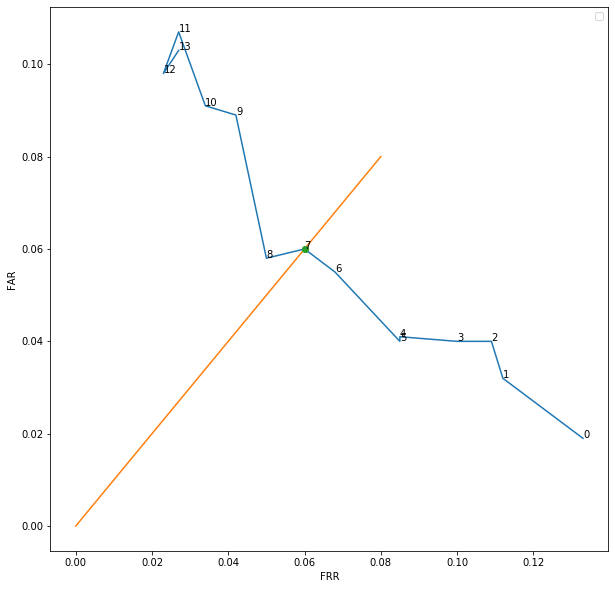

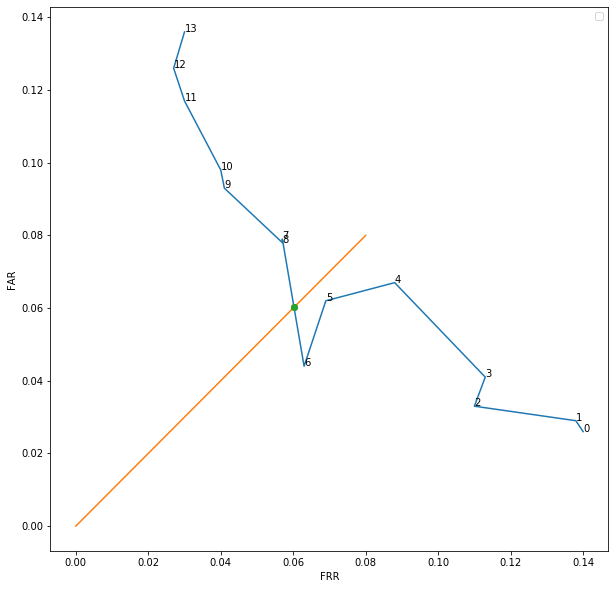

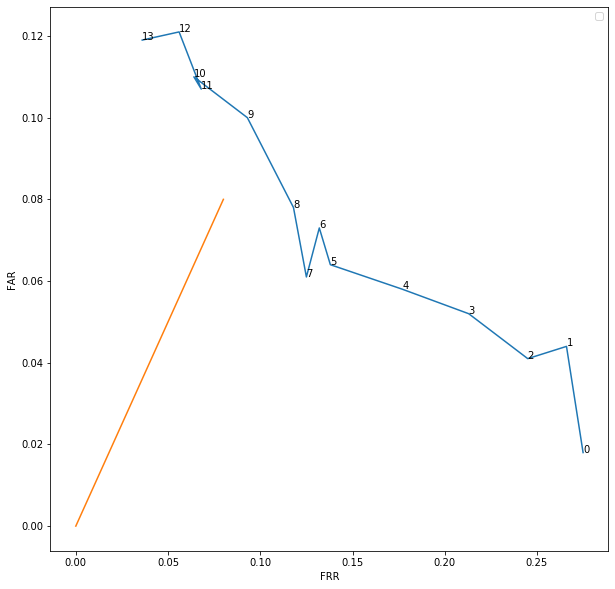

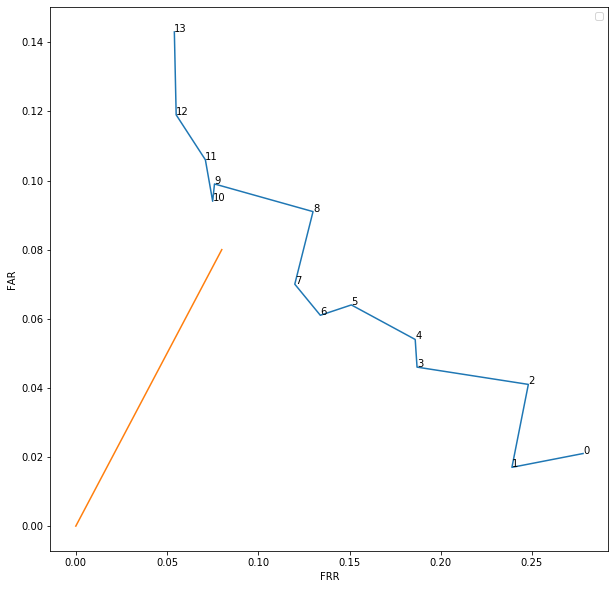

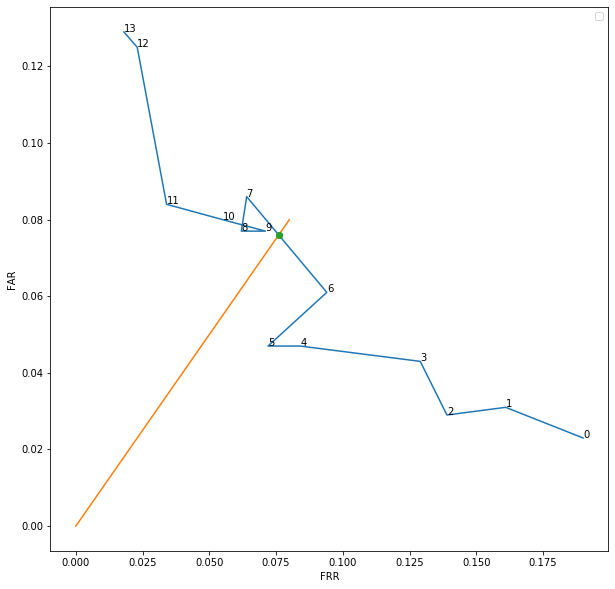

In [17]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Successfully created the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model3sample num_2000pair_ouer shift160 
1 )  0.235 . 
 94.35 % 
 true_result: 1887 false_result: 113 
 TP: 910 FN: 90 FRR: 0.09 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.056499999999999995 

2 )  0.245 . 
 95.3 % 
 true_result: 1906 false_result: 94 
 TP: 924 FN: 76 FRR: 0.076 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.047 

3 )  0.255 . 
 95.45 % 
 true_result: 1909 false_result: 91 
 TP: 941 FN: 59 FRR: 0.059 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.0455 

4 )  0.265 . 
 96.25 % 
 true_result: 1925 false_result: 75 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.037500000000000006 

5 )  0.275 . 
 95.5 % 
 true_result: 1910 false_result: 90 
 TP: 947 FN: 53 FRR: 0.053 
 TN: 963 FP: 37 FAR: 0.037 
 EER: 0.045 

6 )  0.285 . 
 95.75 % 
 true_result: 1915 false_result: 85 
 TP: 957 FN: 43 FRR: 0.043 
 TN: 958 FP: 42 FAR: 0.042 
 EER: 0.042499999999999996 

7 )  

No handles with labels found to put in legend.


14 )  0.365 . 
 94.75 % 
 true_result: 1895 false_result: 105 
 TP: 993 FN: 7 FRR: 0.007 
 TN: 902 FP: 98 FAR: 0.098 
 EER: 0.052500000000000005 

POINT (0.04227272727272727 0.04227272727272727)
####S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model3sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 93.85 % 
 true_result: 1877 false_result: 123 
 TP: 894 FN: 106 FRR: 0.106 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.0615 

2 )  0.245 . 
 94.65 % 
 true_result: 1893 false_result: 107 
 TP: 912 FN: 88 FRR: 0.088 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.0535 

3 )  0.255 . 
 95.05 % 
 true_result: 1901 false_result: 99 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 972 FP: 28 FAR: 0.028 
 EER: 0.049499999999999995 

4 )  0.265 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 945 FN: 55 FRR: 0.055 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.04 

5 )  0.275 . 
 96.5 % 
 true_result: 1930 false_result: 70 
 TP: 958 FN: 42 FR

No handles with labels found to put in legend.


14 )  0.365 . 
 93.9 % 
 true_result: 1878 false_result: 122 
 TP: 994 FN: 6 FRR: 0.006 
 TN: 884 FP: 116 FAR: 0.116 
 EER: 0.061000000000000006 

POINT (0.03733333333333333 0.03733333333333333)
####S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model3sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 87.75 % 
 true_result: 1755 false_result: 245 
 TP: 766 FN: 234 FRR: 0.234 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.12250000000000001 

2 )  0.245 . 
 89.2 % 
 true_result: 1784 false_result: 216 
 TP: 804 FN: 196 FRR: 0.196 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.108 

3 )  0.255 . 
 89.3 % 
 true_result: 1786 false_result: 214 
 TP: 807 FN: 193 FRR: 0.193 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.107 

4 )  0.265 . 
 91.8 % 
 true_result: 1836 false_result: 164 
 TP: 860 FN: 140 FRR: 0.14 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.082 

5 )  0.275 . 
 92.6 % 
 true_result: 1852 false_result: 148 
 TP: 884 FN: 116

No handles with labels found to put in legend.


14 )  0.365 . 
 94.15 % 
 true_result: 1883 false_result: 117 
 TP: 988 FN: 12 FRR: 0.012 
 TN: 895 FP: 105 FAR: 0.105 
 EER: 0.058499999999999996 

POINT (0.0562 0.0562)
####S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model3sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 88.1 % 
 true_result: 1762 false_result: 238 
 TP: 775 FN: 225 FRR: 0.225 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.11900000000000001 

2 )  0.245 . 
 88.65 % 
 true_result: 1773 false_result: 227 
 TP: 789 FN: 211 FRR: 0.211 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.11349999999999999 

3 )  0.255 . 
 89.65 % 
 true_result: 1793 false_result: 207 
 TP: 817 FN: 183 FRR: 0.183 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.1035 

4 )  0.265 . 
 90.85 % 
 true_result: 1817 false_result: 183 
 TP: 845 FN: 155 FRR: 0.155 
 TN: 972 FP: 28 FAR: 0.028 
 EER: 0.0915 

5 )  0.275 . 
 93.55 % 
 true_result: 1871 false_result: 129 
 TP: 896 FN: 104 FR

No handles with labels found to put in legend.


14 )  0.365 . 
 93.15 % 
 true_result: 1863 false_result: 137 
 TP: 986 FN: 14 FRR: 0.014 
 TN: 877 FP: 123 FAR: 0.123 
 EER: 0.0685 

POINT (0.06290909090909091 0.06290909090909091)
####S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model3sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 93.95 % 
 true_result: 1879 false_result: 121 
 TP: 891 FN: 109 FRR: 0.109 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.0605 

2 )  0.245 . 
 93.55 % 
 true_result: 1871 false_result: 129 
 TP: 897 FN: 103 FRR: 0.103 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.0645 

3 )  0.255 . 
 94.05 % 
 true_result: 1881 false_result: 119 
 TP: 904 FN: 96 FRR: 0.096 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.0595 

4 )  0.265 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.0465 

5 )  0.275 . 
 95.4 % 
 true_result: 1908 false_result: 92 
 TP: 938 FN: 62 FRR: 0.062 
 TN: 97

No handles with labels found to put in legend.


14 )  0.365 . 
 94.45 % 
 true_result: 1889 false_result: 111 
 TP: 991 FN: 9 FRR: 0.009 
 TN: 898 FP: 102 FAR: 0.102 
 EER: 0.055499999999999994 

POINT (0.048 0.048)
####S1(0-108)_S2(0-108)


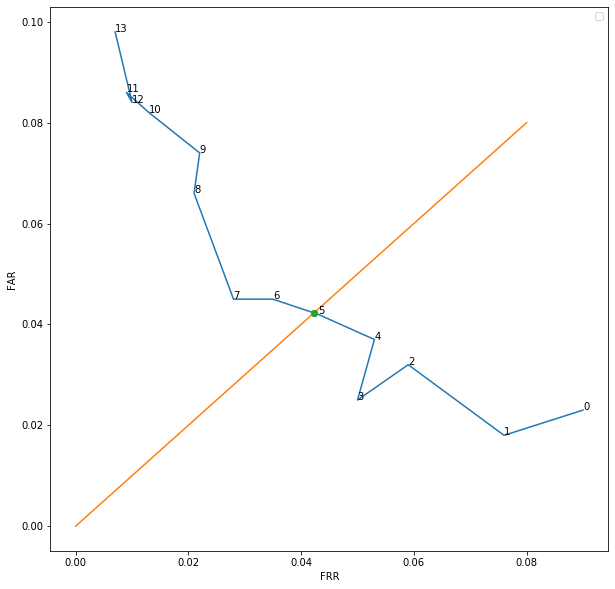

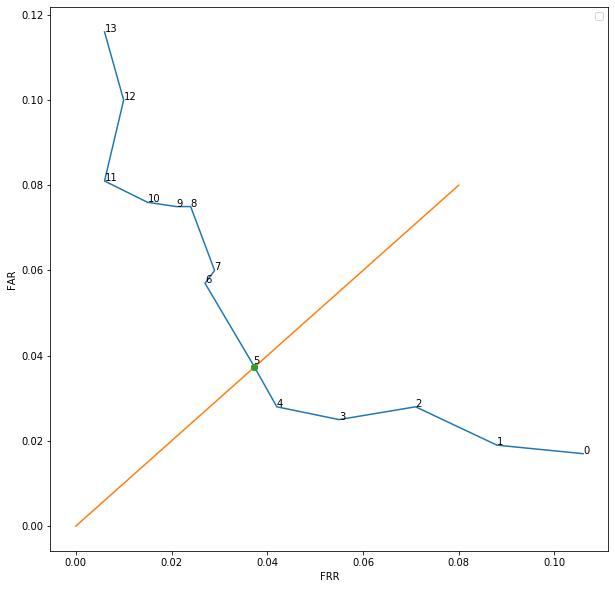

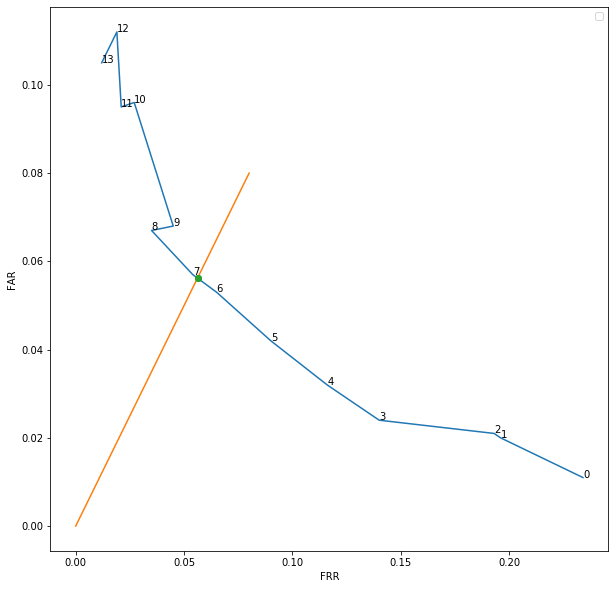

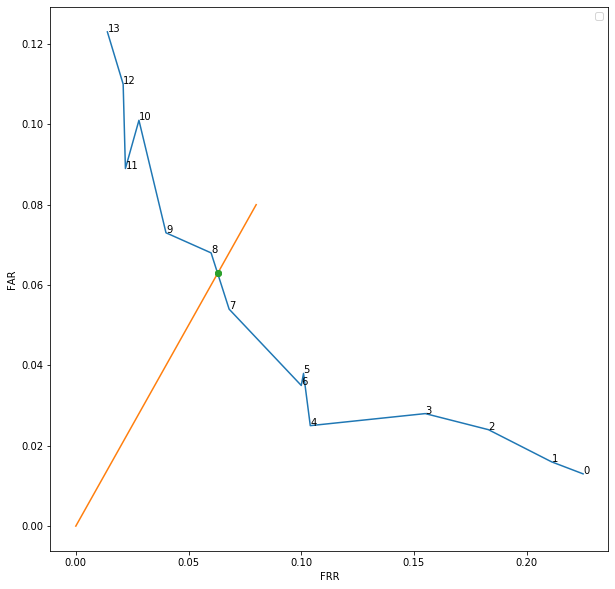

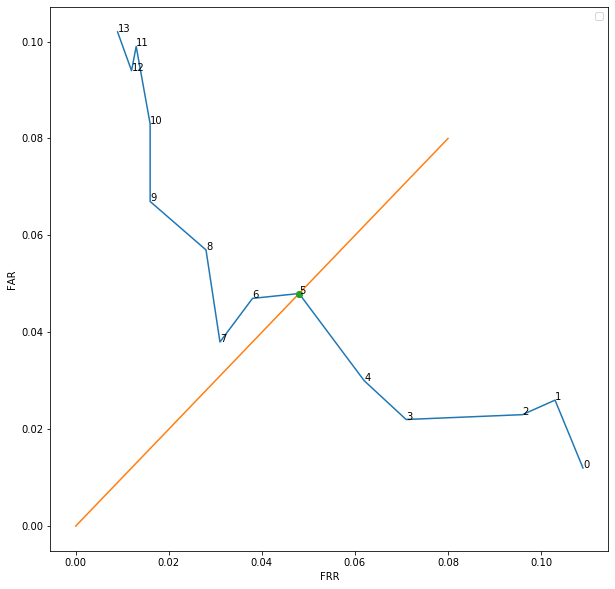

In [19]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model5sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 94.95 % 
 true_result: 1899 false_result: 101 
 TP: 913 FN: 87 FRR: 0.087 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.050499999999999996 

2 )  0.245 . 
 95.55 % 
 true_result: 1911 false_result: 89 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.0445 

3 )  0.255 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.035500000000000004 

4 )  0.265 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 948 FN: 52 FRR: 0.052 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.038 

5 )  0.275 . 
 96.9 % 
 true_result: 1938 false_result: 62 
 TP: 970 FN: 30 FRR: 0.03 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.031 

6 )  0.285 . 
 96.7 % 
 true_result: 1934 false_result: 66 
 TP: 969 FN: 31 FRR: 0.031 
 TN: 965 FP: 35 FAR: 0.035 
 EER: 0.033 

7 )  0.295 . 
 96.9 % 
 

No handles with labels found to put in legend.


14 )  0.365 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 999 FN: 1 FRR: 0.001 
 TN: 908 FP: 92 FAR: 0.092 
 EER: 0.0465 

POINT (0.03146666666666667 0.03146666666666666)
####sample img num:5_S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model5sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 94.75 % 
 true_result: 1895 false_result: 105 
 TP: 914 FN: 86 FRR: 0.086 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.0525 

2 )  0.245 . 
 95.3 % 
 true_result: 1906 false_result: 94 
 TP: 926 FN: 74 FRR: 0.074 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.047 

3 )  0.255 . 
 96.6 % 
 true_result: 1932 false_result: 68 
 TP: 951 FN: 49 FRR: 0.049 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.034 

4 )  0.265 . 
 96.05 % 
 true_result: 1921 false_result: 79 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.0395 

5 )  0.275 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 961 FN: 39 FRR: 0.039 
 TN: 96

No handles with labels found to put in legend.


14 )  0.365 . 
 94.55 % 
 true_result: 1891 false_result: 109 
 TP: 997 FN: 3 FRR: 0.003 
 TN: 894 FP: 106 FAR: 0.106 
 EER: 0.0545 

POINT (0.03866666666666667 0.03866666666666667)
####sample img num:5_S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model5sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 88.85 % 
 true_result: 1777 false_result: 223 
 TP: 794 FN: 206 FRR: 0.206 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.11149999999999999 

2 )  0.245 . 
 90.5 % 
 true_result: 1810 false_result: 190 
 TP: 830 FN: 170 FRR: 0.17 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.095 

3 )  0.255 . 
 91.45 % 
 true_result: 1829 false_result: 171 
 TP: 850 FN: 150 FRR: 0.15 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.08549999999999999 

4 )  0.265 . 
 93.3 % 
 true_result: 1866 false_result: 134 
 TP: 899 FN: 101 FRR: 0.101 
 TN: 967 FP: 33 FAR: 0.033 
 EER: 0.067 

5 )  0.275 . 
 93.35 % 
 true_result: 1867 false_result: 13

No handles with labels found to put in legend.


14 )  0.365 . 
 94.35 % 
 true_result: 1887 false_result: 113 
 TP: 997 FN: 3 FRR: 0.003 
 TN: 890 FP: 110 FAR: 0.11 
 EER: 0.0565 

POINT (0.04454901960784314 0.04454901960784314)
####sample img num:5_S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model5sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 87.55 % 
 true_result: 1751 false_result: 249 
 TP: 758 FN: 242 FRR: 0.242 
 TN: 993 FP: 7 FAR: 0.007 
 EER: 0.1245 

2 )  0.245 . 
 91.2 % 
 true_result: 1824 false_result: 176 
 TP: 837 FN: 163 FRR: 0.163 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.08800000000000001 

3 )  0.255 . 
 92.7 % 
 true_result: 1854 false_result: 146 
 TP: 863 FN: 137 FRR: 0.137 
 TN: 991 FP: 9 FAR: 0.009 
 EER: 0.07300000000000001 

4 )  0.265 . 
 93.65 % 
 true_result: 1873 false_result: 127 
 TP: 892 FN: 108 FRR: 0.108 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.0635 

5 )  0.275 . 
 94.0 % 
 true_result: 1880 false_result: 1

No handles with labels found to put in legend.


14 )  0.365 . 
 93.15 % 
 true_result: 1863 false_result: 137 
 TP: 996 FN: 4 FRR: 0.004 
 TN: 867 FP: 133 FAR: 0.133 
 EER: 0.0685 

POINT (0.041 0.041)
####sample img num:5_S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model5sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 93.65 % 
 true_result: 1873 false_result: 127 
 TP: 887 FN: 113 FRR: 0.113 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.0635 

2 )  0.245 . 
 94.75 % 
 true_result: 1895 false_result: 105 
 TP: 910 FN: 90 FRR: 0.09 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.0525 

3 )  0.255 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 940 FN: 60 FRR: 0.06 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.04 

4 )  0.265 . 
 95.8 % 
 true_result: 1916 false_result: 84 
 TP: 944 FN: 56 FRR: 0.056 
 TN: 972 FP: 28 FAR: 0.028 
 EER: 0.042 

5 )  0.275 . 
 96.7 % 
 true_result: 1934 false_result: 66 
 TP: 961 FN: 39 FRR: 0.039 
 TN: 973 FP: 27 FAR: 0.027 
 

No handles with labels found to put in legend.


14 )  0.365 . 
 94.45 % 
 true_result: 1889 false_result: 111 
 TP: 998 FN: 2 FRR: 0.002 
 TN: 891 FP: 109 FAR: 0.109 
 EER: 0.0555 

POINT (0.0358 0.0358)
####sample img num:5_S1(0-108)_S2(0-108)


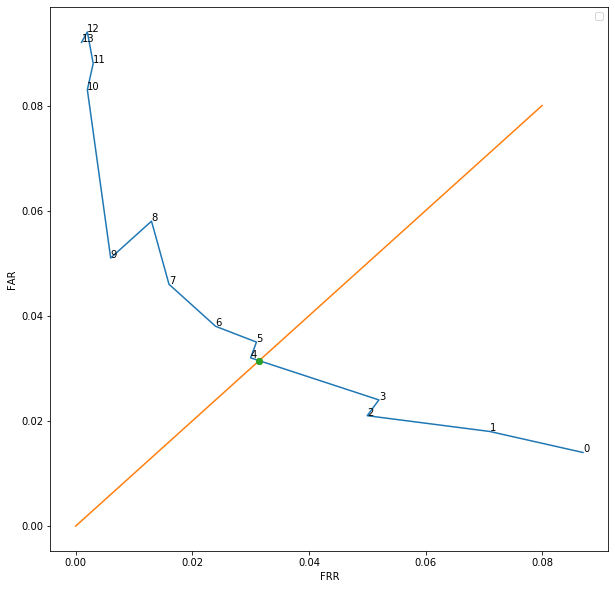

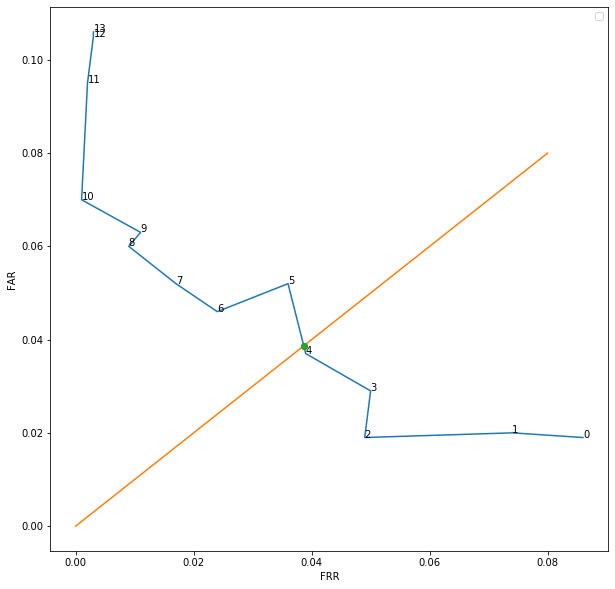

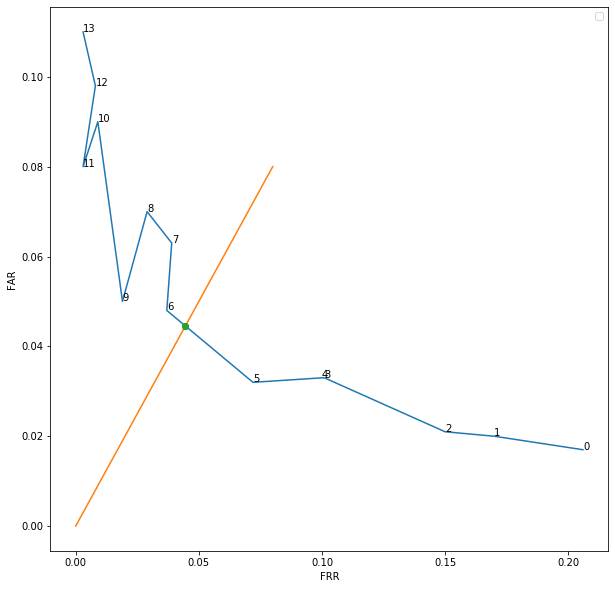

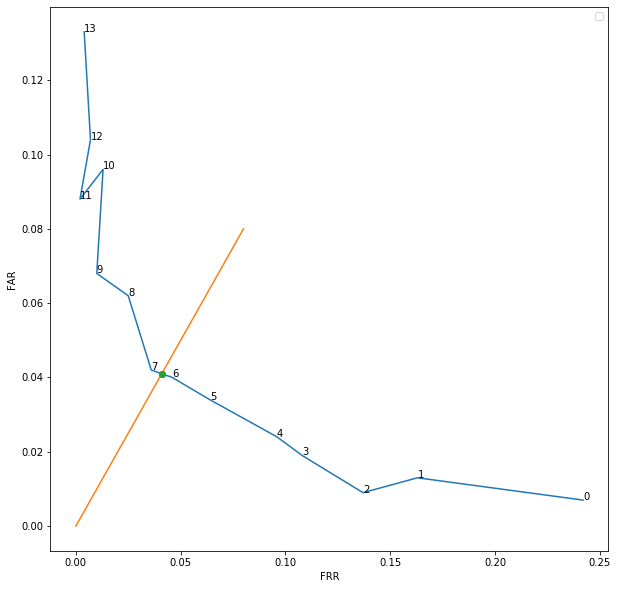

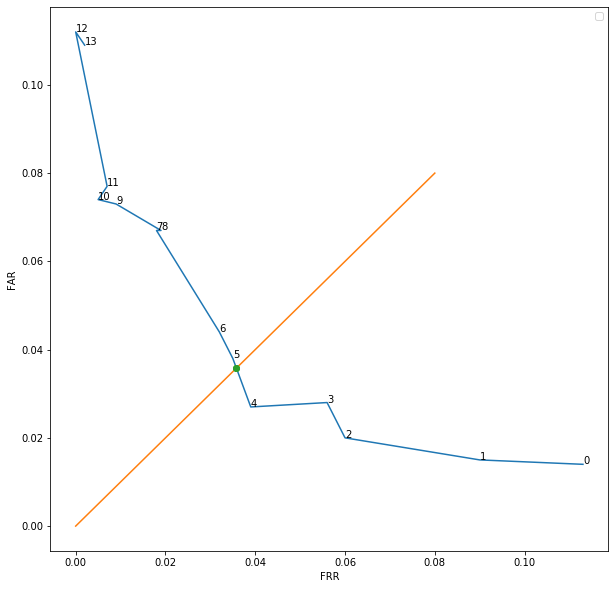

In [24]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Successfully created the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model10sample num_2000pair_ouer shift160 
1 )  0.235 . 
 97.4 % 
 true_result: 1948 false_result: 52 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 990 FP: 10 FAR: 0.01 
 EER: 0.026000000000000002 

2 )  0.245 . 
 97.05 % 
 true_result: 1941 false_result: 59 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.029500000000000002 

3 )  0.255 . 
 97.5 % 
 true_result: 1950 false_result: 50 
 TP: 975 FN: 25 FRR: 0.025 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.025 

4 )  0.265 . 
 97.55 % 
 true_result: 1951 false_result: 49 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.0245 

5 )  0.275 . 
 97.65 % 
 true_result: 1953 false_result: 47 
 TP: 991 FN: 9 FRR: 0.009 
 TN: 962 FP: 38 FAR: 0.038 
 EER: 0.0235 

6 )  0.285 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 997 FN: 3 FRR: 0.003 
 TN: 958 FP: 42 FAR: 0.042 
 EER: 0.022500000000000003 

7 )  

No handles with labels found to put in legend.


14 )  0.365 . 
 93.65 % 
 true_result: 1873 false_result: 127 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 873 FP: 127 FAR: 0.127 
 EER: 0.0635 

POINT (0.025 0.025)
####sample img num:10_S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model10sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 97.0 % 
 true_result: 1940 false_result: 60 
 TP: 961 FN: 39 FRR: 0.039 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.03 

2 )  0.245 . 
 97.25 % 
 true_result: 1945 false_result: 55 
 TP: 963 FN: 37 FRR: 0.037 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.027499999999999997 

3 )  0.255 . 
 96.95 % 
 true_result: 1939 false_result: 61 
 TP: 966 FN: 34 FRR: 0.034 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.0305 

4 )  0.265 . 
 97.45 % 
 true_result: 1949 false_result: 51 
 TP: 983 FN: 17 FRR: 0.017 
 TN: 966 FP: 34 FAR: 0.034 
 EER: 0.025500000000000002 

5 )  0.275 . 
 97.2 % 
 true_result: 1944 false_result: 56 
 TP: 985 FN: 15 FRR: 0.015 
 T

No handles with labels found to put in legend.


14 )  0.365 . 
 94.0 % 
 true_result: 1880 false_result: 120 
 TP: 999 FN: 1 FRR: 0.001 
 TN: 881 FP: 119 FAR: 0.119 
 EER: 0.06 

POINT (0.02904166666666667 0.02904166666666667)
####sample img num:10_S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model10sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 91.35 % 
 true_result: 1827 false_result: 173 
 TP: 842 FN: 158 FRR: 0.158 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.0865 

2 )  0.245 . 
 94.2 % 
 true_result: 1884 false_result: 116 
 TP: 908 FN: 92 FRR: 0.092 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.057999999999999996 

3 )  0.255 . 
 94.3 % 
 true_result: 1886 false_result: 114 
 TP: 912 FN: 88 FRR: 0.088 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.056999999999999995 

4 )  0.265 . 
 96.05 % 
 true_result: 1921 false_result: 79 
 TP: 953 FN: 47 FRR: 0.047 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.0395 

5 )  0.275 . 
 96.6 % 
 true_result: 1932 false_result: 6

No handles with labels found to put in legend.


14 )  0.365 . 
 94.4 % 
 true_result: 1888 false_result: 112 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 888 FP: 112 FAR: 0.112 
 EER: 0.056 

POINT (0.03434285714285714 0.03434285714285714)
####sample img num:10_S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model10sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 92.35 % 
 true_result: 1847 false_result: 153 
 TP: 858 FN: 142 FRR: 0.142 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0765 

2 )  0.245 . 
 93.6 % 
 true_result: 1872 false_result: 128 
 TP: 886 FN: 114 FRR: 0.114 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.064 

3 )  0.255 . 
 94.85 % 
 true_result: 1897 false_result: 103 
 TP: 910 FN: 90 FRR: 0.09 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.0515 

4 )  0.265 . 
 96.65 % 
 true_result: 1933 false_result: 67 
 TP: 951 FN: 49 FRR: 0.049 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.0335 

5 )  0.275 . 
 96.9 % 
 true_result: 1938 false_result: 62 
 TP: 971 FN: 29 FRR: 0.02

No handles with labels found to put in legend.


14 )  0.365 . 
 93.8 % 
 true_result: 1876 false_result: 124 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 876 FP: 124 FAR: 0.124 
 EER: 0.062 

POINT (0.03128571428571429 0.03128571428571428)
####sample img num:10_S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model10sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 95.55 % 
 true_result: 1911 false_result: 89 
 TP: 926 FN: 74 FRR: 0.074 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.0445 

2 )  0.245 . 
 96.7 % 
 true_result: 1934 false_result: 66 
 TP: 955 FN: 45 FRR: 0.045 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.033 

3 )  0.255 . 
 96.35 % 
 true_result: 1927 false_result: 73 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.036500000000000005 

4 )  0.265 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 973 FN: 27 FRR: 0.027 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.027 

5 )  0.275 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 990 FN: 10

No handles with labels found to put in legend.


14 )  0.365 . 
 95.05 % 
 true_result: 1901 false_result: 99 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 901 FP: 99 FAR: 0.099 
 EER: 0.0495 

POINT (0.027 0.027)
####sample img num:10_S1(0-108)_S2(0-108)


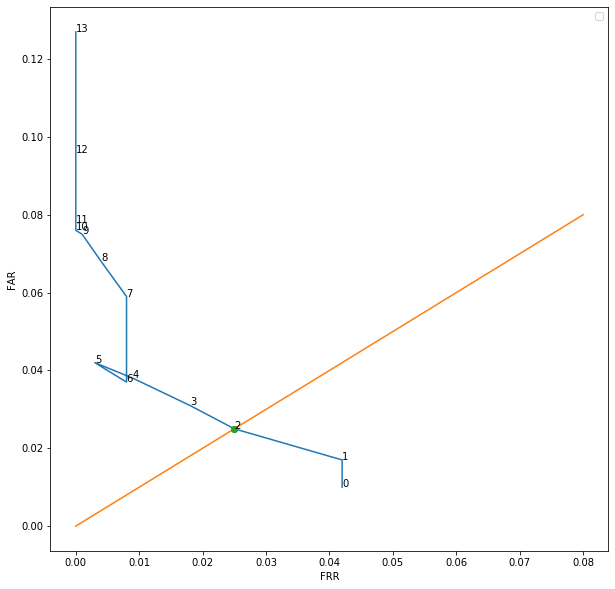

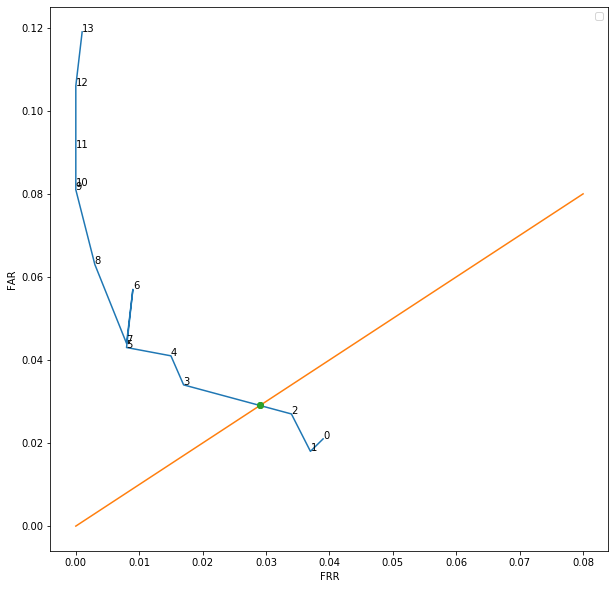

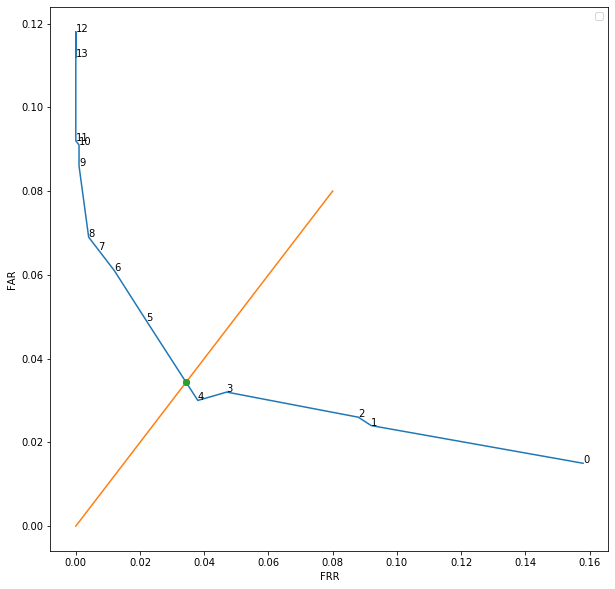

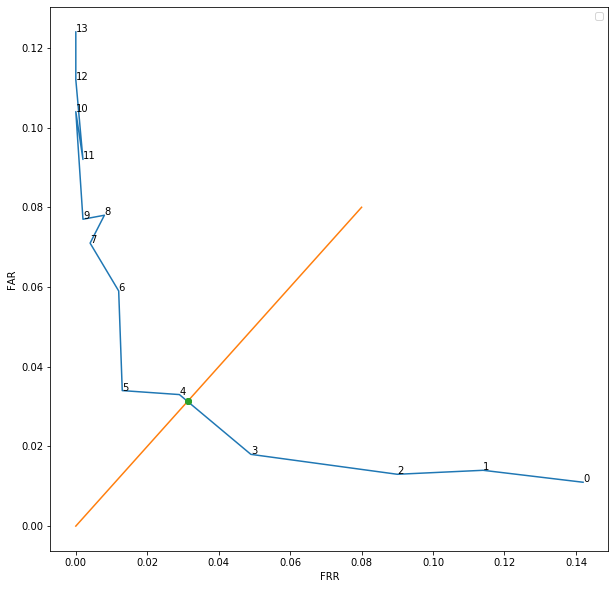

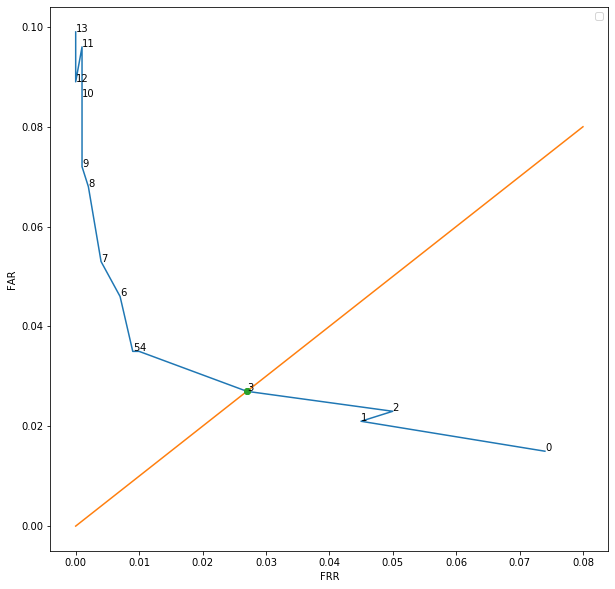

In [26]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Successfully created the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model15sample num_2000pair_ouer shift160 
1 )  0.235 . 
 97.25 % 
 true_result: 1945 false_result: 55 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 993 FP: 7 FAR: 0.007 
 EER: 0.0275 

2 )  0.245 . 
 96.8 % 
 true_result: 1936 false_result: 64 
 TP: 957 FN: 43 FRR: 0.043 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.032 

3 )  0.255 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 965 FN: 35 FRR: 0.035 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.027000000000000003 

4 )  0.265 . 
 97.5 % 
 true_result: 1950 false_result: 50 
 TP: 974 FN: 26 FRR: 0.026 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.025 

5 )  0.275 . 
 98.0 % 
 true_result: 1960 false_result: 40 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.019999999999999997 

6 )  0.285 . 
 97.65 % 
 true_result: 1953 false_result: 47 
 TP: 987 FN: 13 FRR: 0.013 
 TN: 966 FP: 34 FAR: 0.034 
 EER: 0.0235 

7 )  0.295 . 
 97.7 

No handles with labels found to put in legend.


14 )  0.365 . 
 95.0 % 
 true_result: 1900 false_result: 100 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 900 FP: 100 FAR: 0.1 
 EER: 0.05 

POINT (0.02333333333333333 0.02333333333333333)
####sample img num:15_S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model15sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 96.25 % 
 true_result: 1925 false_result: 75 
 TP: 943 FN: 57 FRR: 0.057 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.0375 

2 )  0.245 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 968 FN: 32 FRR: 0.032 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.0225 

3 )  0.255 . 
 96.8 % 
 true_result: 1936 false_result: 64 
 TP: 960 FN: 40 FRR: 0.04 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.032 

4 )  0.265 . 
 97.25 % 
 true_result: 1945 false_result: 55 
 TP: 970 FN: 30 FRR: 0.03 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.0275 

5 )  0.275 . 
 97.2 % 
 true_result: 1944 false_result: 56 
 TP: 979 FN: 21 FRR: 0.021 
 TN: 965

No handles with labels found to put in legend.


14 )  0.365 . 
 94.6 % 
 true_result: 1892 false_result: 108 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 892 FP: 108 FAR: 0.108 
 EER: 0.054 

POINT (0.02763157894736842 0.02763157894736842)
####sample img num:15_S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model15sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 91.05 % 
 true_result: 1821 false_result: 179 
 TP: 834 FN: 166 FRR: 0.166 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.08950000000000001 

2 )  0.245 . 
 92.65 % 
 true_result: 1853 false_result: 147 
 TP: 868 FN: 132 FRR: 0.132 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.07350000000000001 

3 )  0.255 . 
 93.55 % 
 true_result: 1871 false_result: 129 
 TP: 891 FN: 109 FRR: 0.109 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.0645 

4 )  0.265 . 
 95.4 % 
 true_result: 1908 false_result: 92 
 TP: 935 FN: 65 FRR: 0.065 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.046 

5 )  0.275 . 
 96.7 % 
 true_result: 1934 false_result: 66

No handles with labels found to put in legend.


14 )  0.365 . 
 94.85 % 
 true_result: 1897 false_result: 103 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 897 FP: 103 FAR: 0.103 
 EER: 0.0515 

POINT (0.03244444444444444 0.03244444444444444)
####sample img num:15_S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model15sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 90.15 % 
 true_result: 1803 false_result: 197 
 TP: 805 FN: 195 FRR: 0.195 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.0985 

2 )  0.245 . 
 93.1 % 
 true_result: 1862 false_result: 138 
 TP: 864 FN: 136 FRR: 0.136 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.069 

3 )  0.255 . 
 94.5 % 
 true_result: 1890 false_result: 110 
 TP: 898 FN: 102 FRR: 0.102 
 TN: 992 FP: 8 FAR: 0.008 
 EER: 0.05499999999999999 

4 )  0.265 . 
 96.55 % 
 true_result: 1931 false_result: 69 
 TP: 942 FN: 58 FRR: 0.058 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0345 

5 )  0.275 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 956 FN:

No handles with labels found to put in legend.


14 )  0.365 . 
 94.5 % 
 true_result: 1890 false_result: 110 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 890 FP: 110 FAR: 0.11 
 EER: 0.055 

POINT (0.02227777777777778 0.02227777777777778)
####sample img num:15_S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model15sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 94.2 % 
 true_result: 1884 false_result: 116 
 TP: 901 FN: 99 FRR: 0.099 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.058 

2 )  0.245 . 
 96.15 % 
 true_result: 1923 false_result: 77 
 TP: 934 FN: 66 FRR: 0.066 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0385 

3 )  0.255 . 
 96.1 % 
 true_result: 1922 false_result: 78 
 TP: 943 FN: 57 FRR: 0.057 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.039 

4 )  0.265 . 
 96.75 % 
 true_result: 1935 false_result: 65 
 TP: 961 FN: 39 FRR: 0.039 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.0325 

5 )  0.275 . 
 97.45 % 
 true_result: 1949 false_result: 51 
 TP: 976 FN: 24 FRR: 0.024 


No handles with labels found to put in legend.


14 )  0.365 . 
 95.1 % 
 true_result: 1902 false_result: 98 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 902 FP: 98 FAR: 0.098 
 EER: 0.049 

POINT (0.0268125 0.0268125)
####sample img num:15_S1(0-108)_S2(0-108)


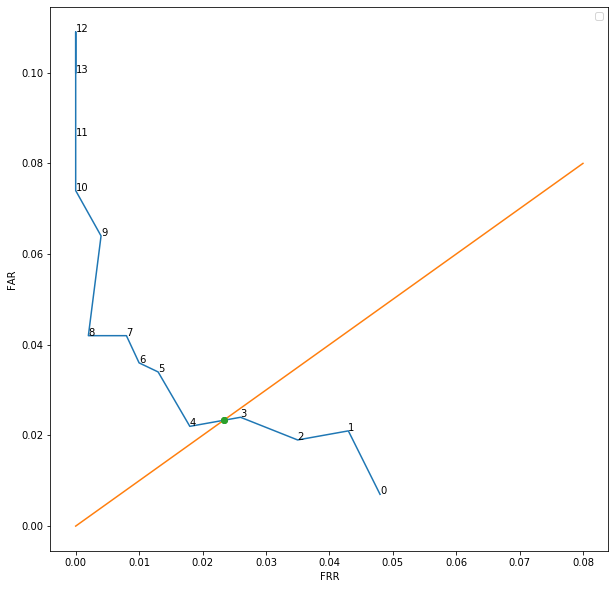

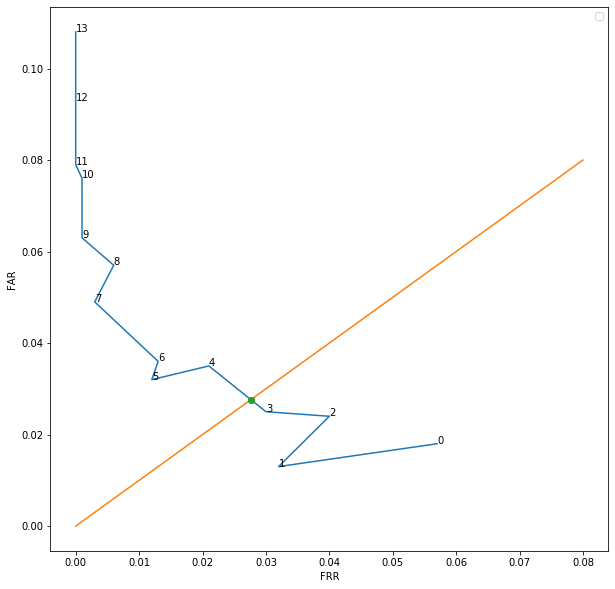

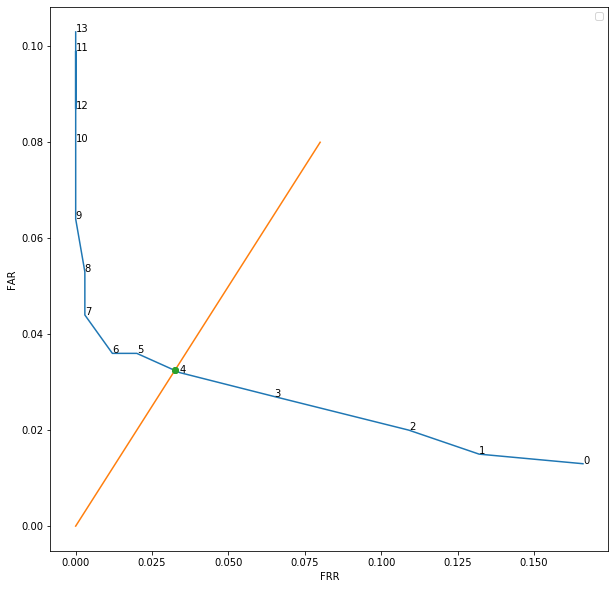

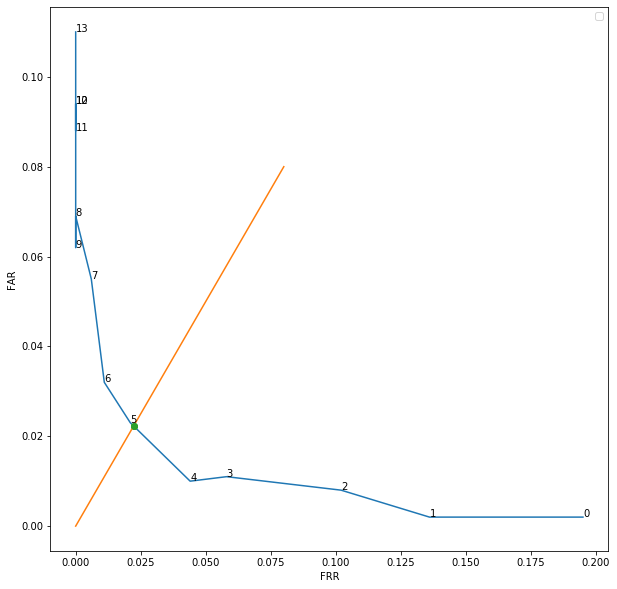

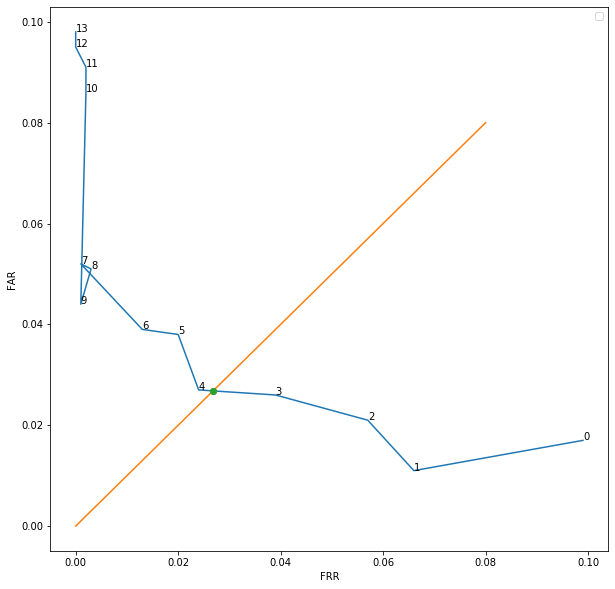

In [28]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Successfully created the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model20sample num_2000pair_ouer shift160 
1 )  0.235 . 
 96.95 % 
 true_result: 1939 false_result: 61 
 TP: 951 FN: 49 FRR: 0.049 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.0305 

2 )  0.245 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 970 FN: 30 FRR: 0.03 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.027 

3 )  0.255 . 
 97.6 % 
 true_result: 1952 false_result: 48 
 TP: 978 FN: 22 FRR: 0.022 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.024 

4 )  0.265 . 
 98.15 % 
 true_result: 1963 false_result: 37 
 TP: 988 FN: 12 FRR: 0.012 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.018500000000000003 

5 )  0.275 . 
 98.05 % 
 true_result: 1961 false_result: 39 
 TP: 990 FN: 10 FRR: 0.01 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.0195 

6 )  0.285 . 
 98.3 % 
 true_result: 1966 false_result: 34 
 TP: 996 FN: 4 FRR: 0.004 
 TN: 970 FP: 30 FAR: 0.03 
 EER: 0.017 

7 )  0.295 . 
 97.65 % 
 true_result:

No handles with labels found to put in legend.


14 )  0.365 . 
 95.1 % 
 true_result: 1902 false_result: 98 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 902 FP: 98 FAR: 0.098 
 EER: 0.049 

POINT (0.0252 0.0252)
####sample img num:20_S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model20sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 96.85 % 
 true_result: 1937 false_result: 63 
 TP: 951 FN: 49 FRR: 0.049 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.0315 

2 )  0.245 . 
 97.05 % 
 true_result: 1941 false_result: 59 
 TP: 966 FN: 34 FRR: 0.034 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.029500000000000002 

3 )  0.255 . 
 97.45 % 
 true_result: 1949 false_result: 51 
 TP: 973 FN: 27 FRR: 0.027 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.025500000000000002 

4 )  0.265 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 985 FN: 15 FRR: 0.015 
 TN: 970 FP: 30 FAR: 0.03 
 EER: 0.0225 

5 )  0.275 . 
 98.55 % 
 true_result: 1971 false_result: 29 
 TP: 990 FN: 10 FRR: 0.01 
 T

No handles with labels found to put in legend.


14 )  0.365 . 
 94.6 % 
 true_result: 1892 false_result: 108 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 892 FP: 108 FAR: 0.108 
 EER: 0.054 

POINT (0.025 0.025)
####sample img num:20_S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model20sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 90.75 % 
 true_result: 1815 false_result: 185 
 TP: 828 FN: 172 FRR: 0.172 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.0925 

2 )  0.245 . 
 93.15 % 
 true_result: 1863 false_result: 137 
 TP: 881 FN: 119 FRR: 0.119 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.06849999999999999 

3 )  0.255 . 
 95.45 % 
 true_result: 1909 false_result: 91 
 TP: 928 FN: 72 FRR: 0.072 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.0455 

4 )  0.265 . 
 96.75 % 
 true_result: 1935 false_result: 65 
 TP: 960 FN: 40 FRR: 0.04 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.0325 

5 )  0.275 . 
 97.0 % 
 true_result: 1940 false_result: 60 
 TP: 983 FN: 17 FRR: 0.017 
 TN: 957 FP

No handles with labels found to put in legend.


14 )  0.365 . 
 94.55 % 
 true_result: 1891 false_result: 109 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 891 FP: 109 FAR: 0.109 
 EER: 0.0545 

POINT (0.03158536585365854 0.03158536585365854)
####sample img num:20_S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model20sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 91.15 % 
 true_result: 1823 false_result: 177 
 TP: 824 FN: 176 FRR: 0.176 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.0885 

2 )  0.245 . 
 94.3 % 
 true_result: 1886 false_result: 114 
 TP: 892 FN: 108 FRR: 0.108 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.057 

3 )  0.255 . 
 96.15 % 
 true_result: 1923 false_result: 77 
 TP: 926 FN: 74 FRR: 0.074 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.0385 

4 )  0.265 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 959 FN: 41 FRR: 0.041 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.027 

5 )  0.275 . 
 98.0 % 
 true_result: 1960 false_result: 40 
 TP: 979 FN: 21 FRR: 0.021 


No handles with labels found to put in legend.


14 )  0.365 . 
 93.9 % 
 true_result: 1878 false_result: 122 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 878 FP: 122 FAR: 0.122 
 EER: 0.061 

POINT (0.01972727272727273 0.01972727272727273)
####sample img num:20_S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model20sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 95.6 % 
 true_result: 1912 false_result: 88 
 TP: 927 FN: 73 FRR: 0.073 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.044 

2 )  0.245 . 
 96.15 % 
 true_result: 1923 false_result: 77 
 TP: 944 FN: 56 FRR: 0.056 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.0385 

3 )  0.255 . 
 96.9 % 
 true_result: 1938 false_result: 62 
 TP: 962 FN: 38 FRR: 0.038 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.031 

4 )  0.265 . 
 98.25 % 
 true_result: 1965 false_result: 35 
 TP: 981 FN: 19 FRR: 0.019 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.0175 

5 )  0.275 . 
 97.95 % 
 true_result: 1959 false_result: 41 
 TP: 988 FN: 12 FRR: 0.012 


No handles with labels found to put in legend.


14 )  0.365 . 
 95.55 % 
 true_result: 1911 false_result: 89 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 911 FP: 89 FAR: 0.089 
 EER: 0.0445 

POINT (0.01795 0.01795)
####sample img num:20_S1(0-108)_S2(0-108)


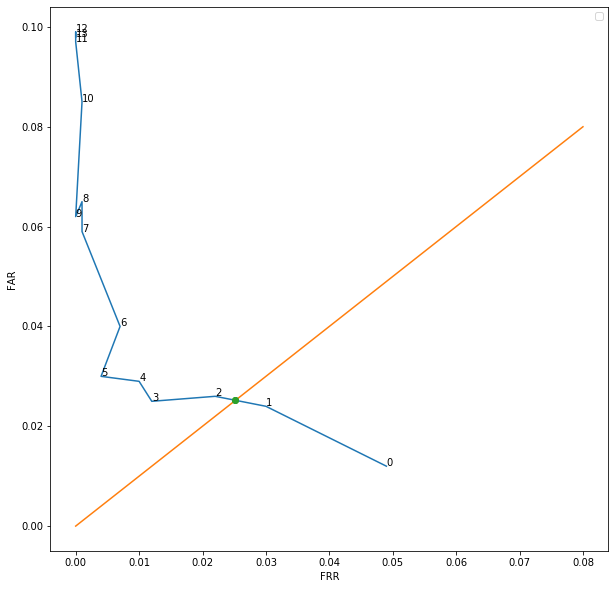

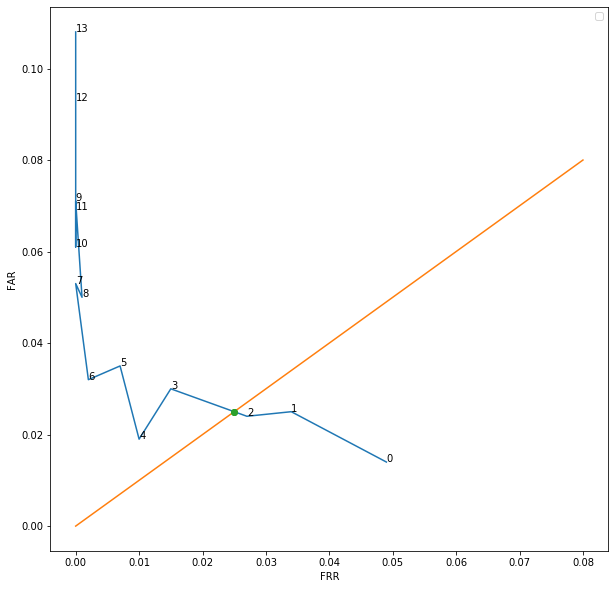

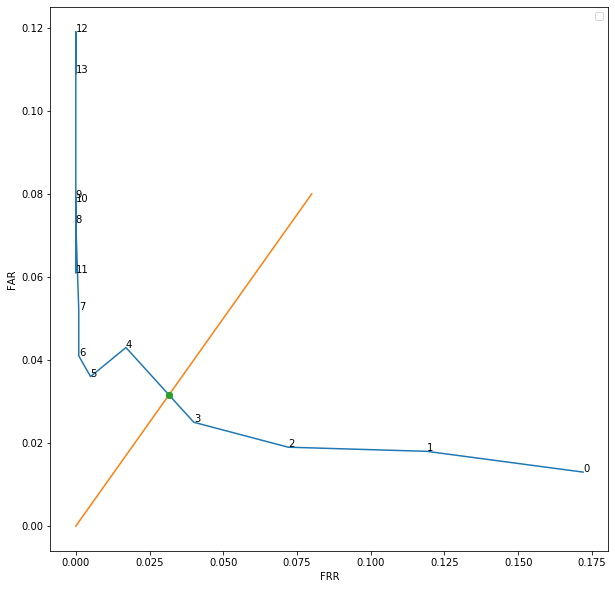

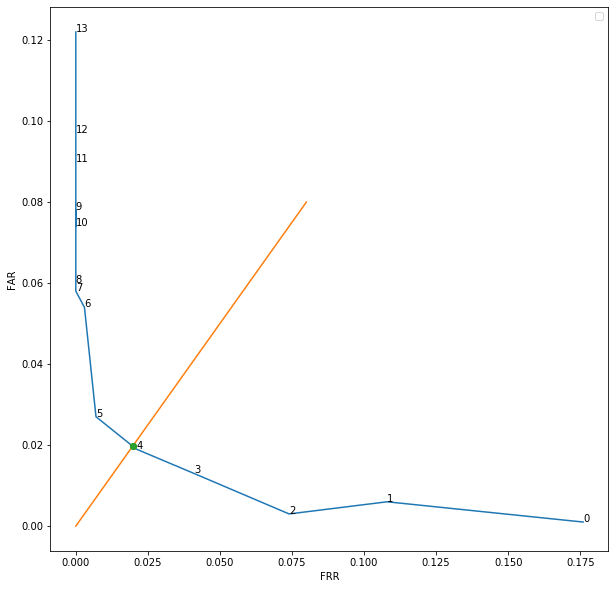

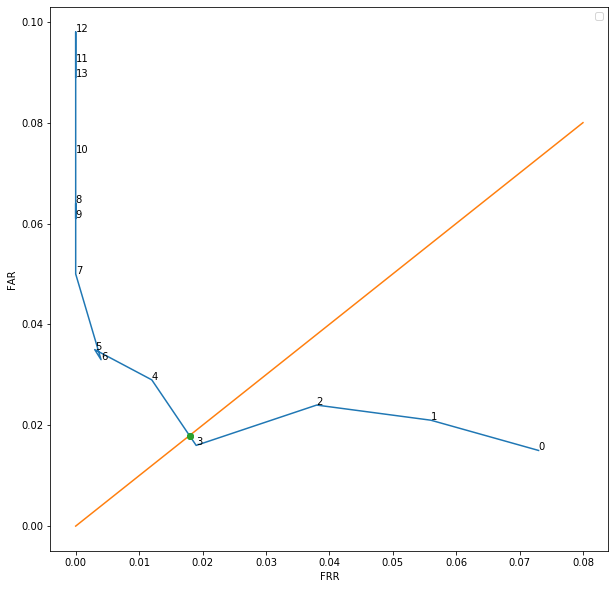

In [30]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Successfully created the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 
1 )  0.235 . 
 96.15 % 
 true_result: 1923 false_result: 77 
 TP: 937 FN: 63 FRR: 0.063 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.0385 

2 )  0.245 . 
 96.55 % 
 true_result: 1931 false_result: 69 
 TP: 949 FN: 51 FRR: 0.051 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.034499999999999996 

3 )  0.255 . 
 97.1 % 
 true_result: 1942 false_result: 58 
 TP: 955 FN: 45 FRR: 0.045 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.028999999999999998 

4 )  0.265 . 
 98.35 % 
 true_result: 1967 false_result: 33 
 TP: 984 FN: 16 FRR: 0.016 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.0165 

5 )  0.275 . 
 98.5 % 
 true_result: 1970 false_result: 30 
 TP: 989 FN: 11 FRR: 0.011 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.015 

6 )  0.285 . 
 98.5 % 
 true_result: 1970 false_result: 30 
 TP: 994 FN: 6 FRR: 0.006 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.015 

7 )  0.295 . 
 97.5

No handles with labels found to put in legend.


14 )  0.365 . 
 95.3 % 
 true_result: 1906 false_result: 94 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 906 FP: 94 FAR: 0.094 
 EER: 0.047 

POINT (0.01687878787878788 0.01687878787878788)
####sample img num:25_S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 96.15 % 
 true_result: 1923 false_result: 77 
 TP: 932 FN: 68 FRR: 0.068 
 TN: 991 FP: 9 FAR: 0.009 
 EER: 0.0385 

2 )  0.245 . 
 96.65 % 
 true_result: 1933 false_result: 67 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.0335 

3 )  0.255 . 
 98.05 % 
 true_result: 1961 false_result: 39 
 TP: 977 FN: 23 FRR: 0.023 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.0195 

4 )  0.265 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.0225 

5 )  0.275 . 
 97.7 % 
 true_result: 1954 false_result: 46 
 TP: 989 FN: 11 FRR: 0.011 
 TN:

No handles with labels found to put in legend.


14 )  0.365 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 904 FP: 96 FAR: 0.096 
 EER: 0.048 

POINT (0.0208125 0.0208125)
####sample img num:25_S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 90.5 % 
 true_result: 1810 false_result: 190 
 TP: 823 FN: 177 FRR: 0.177 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.095 

2 )  0.245 . 
 92.95 % 
 true_result: 1859 false_result: 141 
 TP: 871 FN: 129 FRR: 0.129 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.07050000000000001 

3 )  0.255 . 
 95.9 % 
 true_result: 1918 false_result: 82 
 TP: 931 FN: 69 FRR: 0.069 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.041 

4 )  0.265 . 
 96.35 % 
 true_result: 1927 false_result: 73 
 TP: 953 FN: 47 FRR: 0.047 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.0365 

5 )  0.275 . 
 97.35 % 
 true_result: 1947 false_result: 53 
 TP: 983 FN: 17 FRR: 0.017 
 TN: 96

No handles with labels found to put in legend.


14 )  0.365 . 
 94.25 % 
 true_result: 1885 false_result: 115 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 885 FP: 115 FAR: 0.115 
 EER: 0.0575 

POINT (0.03125 0.03125)
####sample img num:25_S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 91.75 % 
 true_result: 1835 false_result: 165 
 TP: 838 FN: 162 FRR: 0.162 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.0825 

2 )  0.245 . 
 92.4 % 
 true_result: 1848 false_result: 152 
 TP: 849 FN: 151 FRR: 0.151 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.076 

3 )  0.255 . 
 96.1 % 
 true_result: 1922 false_result: 78 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 993 FP: 7 FAR: 0.007 
 EER: 0.039 

4 )  0.265 . 
 97.15 % 
 true_result: 1943 false_result: 57 
 TP: 949 FN: 51 FRR: 0.051 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.028499999999999998 

5 )  0.275 . 
 97.85 % 
 true_result: 1957 false_result: 43 
 TP: 980 FN: 20 FRR: 0.02 
 TN: 977 FP

No handles with labels found to put in legend.


14 )  0.365 . 
 95.05 % 
 true_result: 1901 false_result: 99 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 901 FP: 99 FAR: 0.099 
 EER: 0.0495 

POINT (0.0219375 0.0219375)
####sample img num:25_S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 95.85 % 
 true_result: 1917 false_result: 83 
 TP: 927 FN: 73 FRR: 0.073 
 TN: 990 FP: 10 FAR: 0.01 
 EER: 0.041499999999999995 

2 )  0.245 . 
 96.05 % 
 true_result: 1921 false_result: 79 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 992 FP: 8 FAR: 0.008 
 EER: 0.03949999999999999 

3 )  0.255 . 
 96.85 % 
 true_result: 1937 false_result: 63 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.0315 

4 )  0.265 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 974 FN: 26 FRR: 0.026 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.0225 

5 )  0.275 . 
 98.5 % 
 true_result: 1970 false_result: 30 
 TP: 984 FN: 16 FRR:

No handles with labels found to put in legend.


14 )  0.365 . 
 94.6 % 
 true_result: 1892 false_result: 108 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 892 FP: 108 FAR: 0.108 
 EER: 0.054 

POINT (0.01481818181818182 0.01481818181818182)
####sample img num:25_S1(0-108)_S2(0-108)


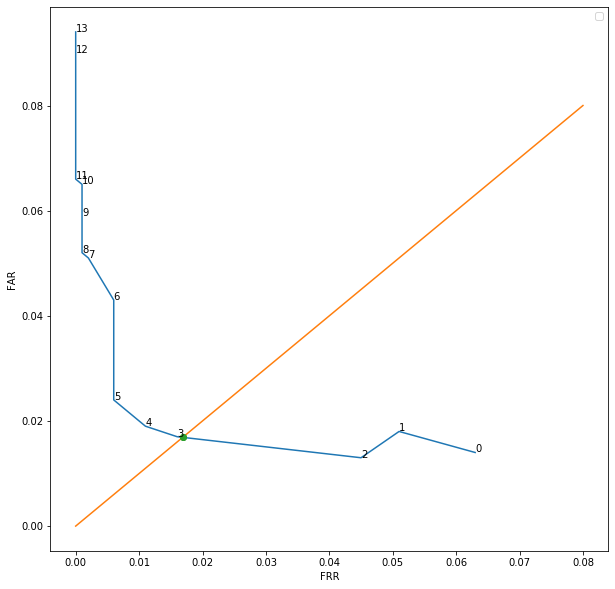

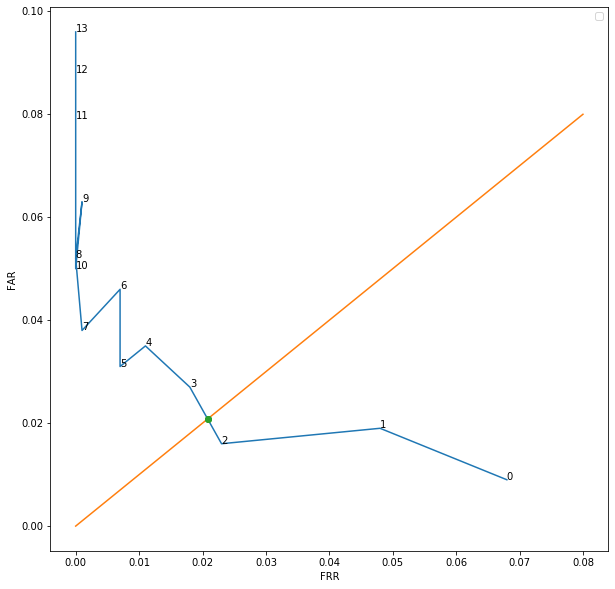

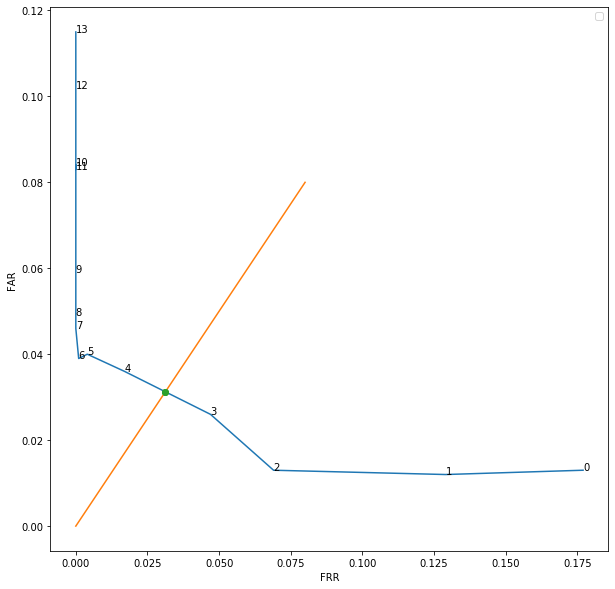

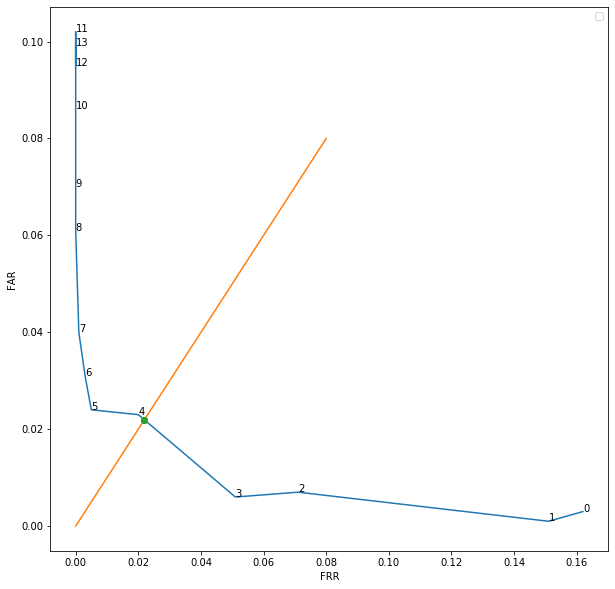

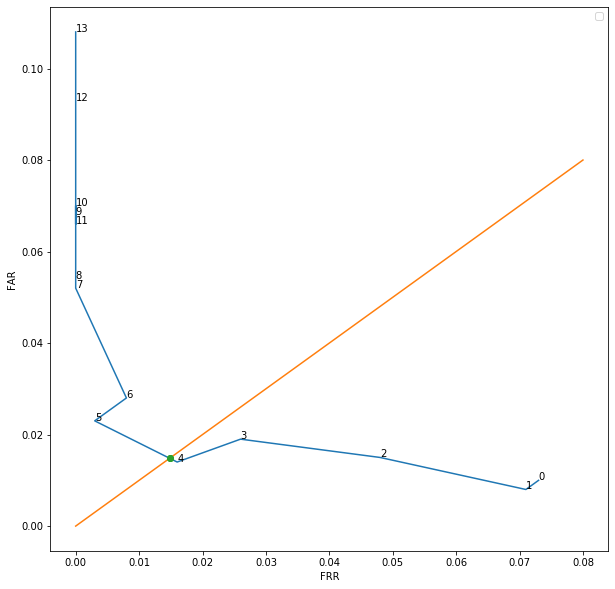

In [32]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)